<a href="https://colab.research.google.com/github/Isabelle-Thong/WMU102-assignment/blob/main/ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diabetes Prediction with Machine Learning**
For this machine learning project, we choose a dataset from the **medical domain**, diabetes. We build this machine learning model to **predict whether a patient have diabetes or not** by interpreting the variables given.

Steps:
1.	Import Necessary Libraries
2.	Read In and Explore the Data
3.	Data Analysis
4.	Data Cleaning
5.  Data Visualization
6.	Choosing the Best Model
7.	Creating Submission File





##**1. Import necessary Libraries**
Firstly, we need to import necessary libraires such as pandas, numpy and seaborn.

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, we upload the dataset: diabetes.csv

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


##**2. Read in and Explore the Data**
It is time to read in our training and testing data using pd.read_csv and take a first look at the training data using the describe function, df().


In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


**Dataset:**
Dataset of diabetes, taken from the hospital Frankfurt, Germany: https://www.kaggle.com/johndasilva/diabetes

Description obtained from the dataset source is unclear, hence, we define the variables given based on common sense and similar datasets of diabetes.

The features above are used to predict whether a person is diabetic or not:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration 
* BloodPressure: Diastolic blood pressure (mm Hg)
* 	SkinThickness: Triceps skin fold thickness (mm)
* 	Insulin: 2-Hour serum insulin (mIU/ml)
* 	BMI: Body mass index (weight in kg/(height in m)2)
* 	DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* 	Outcome: Class variable (0 if non-diabetic, 1 if diabetic)


In [5]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


There are a total of 2000 patients in our dataset. 

##**3. Data Analysis**
We are going to consider the features in the dataset and how complete they are.


Numerical features : Pregnancies (Discrete), Glucose (Discrete),  BloodPressure(Discrete),  SkinThickness (Discrete), Insulin (Discrete), BMI (Continuous), DiabetesPedigreeFunction (Continuous), Age (Discrete)

What are the data types for each feature?
*	Pregnancies : int64
*	Glucose : int64
*	BloodPressure : int64
*	SkinThickness : int64
*	Insulin : int64
*	BMI : float64
*	DiabetesPedigreeFunction : float64
*	Age : int64

We have six int64 and two float64, discrete variables are usually of the int type while continuous variables are usually of float type. 


In [6]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [7]:
#check for any other unusable values
print(pd.isnull(df).sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


At first glance, the dataset is complete an no cleaning process is necessary. However, we soon noticed some problems.

We look back to the previous table and found that the minimum value of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' are zero, this is very unreasonable. We set to find out if there is lots of zeros or just a few.

In [8]:
#Now, we drop unrelevant column for the time being.
R= df.drop(['Pregnancies', 'DiabetesPedigreeFunction',	'Age',	'Outcome'],axis=1)

In [9]:
R

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,138,62,35,0,33.6
1,84,82,31,125,38.2
2,145,0,0,0,44.2
3,135,68,42,250,42.3
4,139,62,41,480,40.7
...,...,...,...,...,...
1995,75,64,24,55,29.7
1996,179,72,42,130,32.7
1997,85,78,0,0,31.2
1998,129,110,46,130,67.1


In [10]:
#The following code counts the number of non-zero values in each column.
R.astype(bool).sum(axis=0)

Glucose          1987
BloodPressure    1910
SkinThickness    1427
Insulin          1044
BMI              1972
dtype: int64

Some of the variables just have some zeros while some have too much. Those variables are important and we can't drop them.

Hence, we attempt to replace them with reasonable assumptions.

**Assumptions made:**

A person with high BMI value will have high glucose level, high blood pressure,  high skin thickness, and high insulin level.

By 'high' we refer to medical data or diabetic samples.

These assumptions may be biased as a person with high BMI is not necesarily obese.

##**4. Data Cleaning**
###**BMI**

There isn't much zeros in 'BMI', hence, we decided to drop the whole row if 'BMI'=0.

In [11]:
df = df[df.BMI  != 0]

In [12]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3.711460,121.468560,69.791075,21.162272,81.258114,32.650101,0.470965,33.158215,0.345335
std,3.306346,32.127892,18.071310,16.063675,111.597017,7.241027,0.321058,11.731969,0.475598
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.500000,72.000000,23.000000,43.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Alright, now 'BMI' minimum value is no longer zero. Data count is 1972. We proceed to replace 0 calue data in other columns.

###**Glucose** 

BMI:

* <18.5  : Underweight
* 18.5-25: Healthy
* 25-30  : Overweight
* .>30    : Obesity


Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test (mg/dL)

2 hours Oral Glucose Tolerance Test [(OGTT)](https://labtestsonline.org/tests/glucose-tolerance-test):

After 2 hours, 
* Less than 140 mg/dL: Normal glucose tolerance
* From 140-199 mg/dL :Impaired glucose tolerance (prediabetes)
* Equal to or greater than 200 mg/dL :Elevated (hyperglycemia is present)

We assume that the data is not taken when anyone is pregnant.
We assume that high BMI relates with high glucose level.

Hence, if the people are obese, let 'Glucose'= 170, else, 'Glucose'= 130.
(Replacement of data with 0 value only)

In [13]:
#The following code is used to remove warnings when preforming replacement of data.
pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
#Using np.where, specifying the desired conditions. If True, yield x, otherwise yield y.
#np.where(condition, x, y)
df.Glucose = np.where( ((df.BMI > 30 ) & (df.Glucose == 0)), 170, df.Glucose)

In [15]:
df.Glucose = np.where( ((df.BMI <= 30 ) & (df.Glucose == 0)), 130, df.Glucose)

In [16]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3.711460,122.508114,69.791075,21.162272,81.258114,32.650101,0.470965,33.158215,0.345335
std,3.306346,30.736081,18.071310,16.063675,111.597017,7.241027,0.321058,11.731969,0.475598
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,23.000000,43.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


'Glucose' done.

###**Blood Pressure**
BloodPressure: Diastolic blood pressure (mm Hg)

Diastolic: relating to the phase of the heartbeat when the heart muscle relaxes and allows the chambers to fill with blood

[Blood Pressure](https://www.cdc.gov/bloodpressure/about.htm):

* Normal: less than 80 mm Hg (diastolic)

* High blood pressure (hypertension):  80 mm Hg or higher (diastolic)

We assume that high BMI relates with high blood pressure.

Hence, if the people are obese, let 'BloodPressure'= 90, else, 'BloodPressure'= 70.
(Replacement of data with 0 value only)

In [17]:
df.BloodPressure = np.where( ((df.BMI > 30 ) & (df.BloodPressure == 0)), 90, df.BloodPressure)

In [18]:
df.BloodPressure = np.where( ((df.BMI <= 30 ) & (df.BloodPressure == 0)), 70, df.BloodPressure)

In [19]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3.711460,122.508114,72.646045,21.162272,81.258114,32.650101,0.470965,33.158215,0.345335
std,3.306346,30.736081,12.239222,16.063675,111.597017,7.241027,0.321058,11.731969,0.475598
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,23.000000,43.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


'	BloodPressure' done.

###**Skin Thickness**
SkinThickness: Triceps skin fold thickness (mm)

It is value used to estimate body fat, measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula.

[Skin Thickness](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5031196/):

* Normal: 20.6 (mean)

* Diabetes: 24.3 (mean)

The data referred to are girls with mean age of 16 and diabetes here refer to type 1 diabetes particularly. Hence, we assume there is no much difference between age, gender and the types of diabetes here.


We assume that high BMI relates with high skin thickness. 

Hence, if the people are obese, let 'SkinThickness'= 24.3, else, 'SkinThickness'= 20.6.
(Replacement of data with 0 value only)

In [20]:
df.SkinThickness = np.where( ((df.BMI > 30 ) & (df.SkinThickness == 0)), 24.3, df.SkinThickness)

In [21]:
df.SkinThickness = np.where( ((df.BMI <= 30 ) & (df.SkinThickness == 0)), 20.6, df.SkinThickness)

In [22]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3.711460,122.508114,72.646045,27.466024,81.258114,32.650101,0.470965,33.158215,0.345335
std,3.306346,30.736081,12.239222,9.725665,111.597017,7.241027,0.321058,11.731969,0.475598
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.600000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,24.300000,43.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


'SkinThickness' done

###**Insulin**
Insulin: 2-hour (post-75 g oral glucose) serum insulin levels ( mIU/L)

Obesity is associated with an increased risk of developing insulin resistance and type 2 diabetes. 

Insulin is a hormone that's normally produced by your pancreas, which helps regulate blood sugar. When the body becomes resistant to insulin, it tries to cope by producing more insulin. 

People with **insulin resistance are often producing too more insulin** than healthy people. Producing too much insulin is known as hyperinsulinemia. Hyperinsulinemia means the amount of insulin in your blood is higher than what's considered normal. This alone isn't diabetes. But hyperinsulinemia is often associated with type 2 diabetes

[Insulin](https://emedicine.medscape.com/article/2089224-overview):

* Normal: 16-166 mIU/L

We assume that high BMI relates with high insulin level.

Hence, if the people are obese, let 'Insulin'= 185, else, 'Insulin'= 130.
(Replacement of data with 0 value only)

In [23]:
df.Insulin = np.where( ((df.BMI > 30 ) & (df.Insulin == 0)), 185, df.Insulin)

In [24]:
df.Insulin = np.where( ((df.BMI <= 30 ) & (df.Insulin == 0)), 130, df.Insulin)

In [25]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3.711460,122.508114,72.646045,27.466024,157.274848,32.650101,0.470965,33.158215,0.345335
std,3.306346,30.736081,12.239222,9.725665,83.124142,7.241027,0.321058,11.731969,0.475598
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.600000,120.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,24.300000,140.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,185.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


'Insulin' done.

We are done with data cleaning.

##**5.  Data Visualization**

Some predictions are made : 
*	The patients with or without pregnancy will not affect diabetes.
*	The patients with higher glucose level are predicted to have higher chance of getting diabetes.
*	The patients with high blood pressure have higher a higher risk of developing   diabetes.
*	The skin thickness of the patients will affect the diabetes.
*	The patients insulin level will not affect diabetes.
*	The patients with higher BMI are more likely predicted to have diabetes.
* The patients with high Diabetes Pedigree Function score are more likely to have diabetes.
*	The age does not really affect the possibility of having diabetes.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

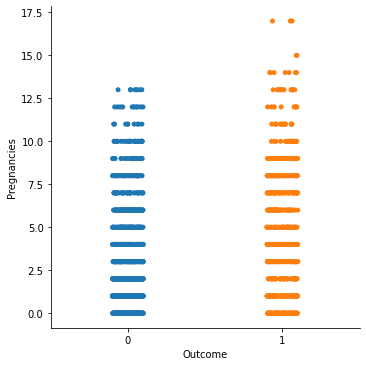

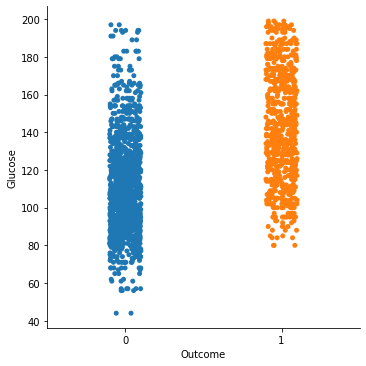

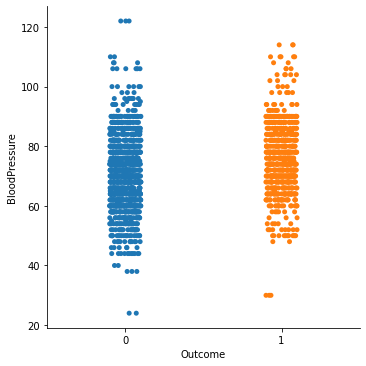

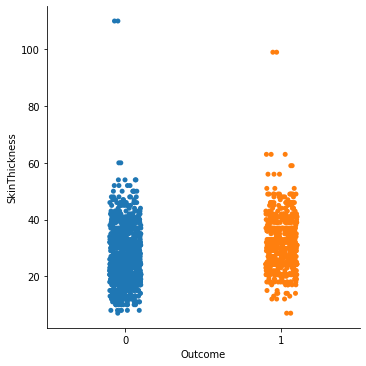

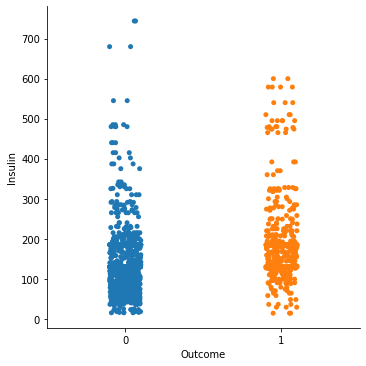

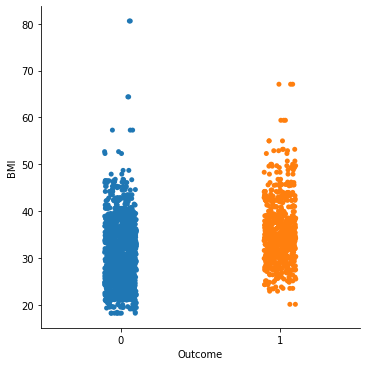

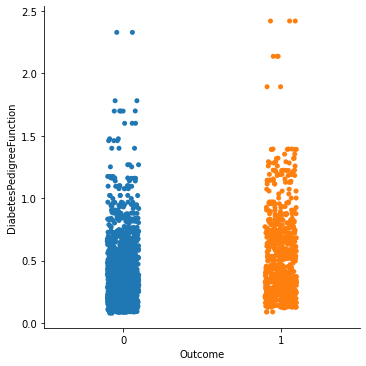

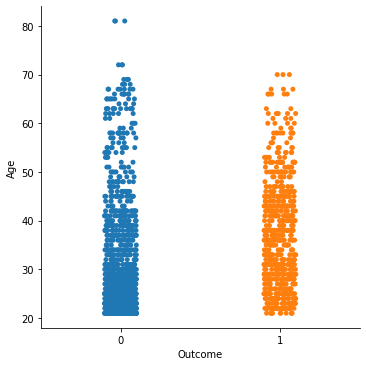

In [26]:
#This is used to visualize our data and to check whether our predictions are accurate.
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

**Pregnancies:**
From the graph, the number of dots for both outcomes are almost the same. This shows that diabetes will not be affected by pregnancies. The prediction is true.

**Glucose:**
From the graph, the number of orange dots are more than blue dots at glucose level adound 150 to 200. This shows that the higher the glucose, the higher the number of diabetic patients. The prediction is true.

**Blood Pressure:**
From the graph, the number of orange dots are more than blue dots at blood pressure around 80 to 100 mm Hg. This shows that the higher theblood pressure, the higher the number of  diabetic patients. The prediction is true.

**Skin Thickness:**
From the graph, the number of orange dots increases after around 20 mm.   This shows that higher skin thickness increase the risk of diabetes. The prediction is true. 

**Insulin:**
From the graph, a lot of orange dot occur around 100-200 mIU/L.However, there are also lots of blue dots at this level. This shows that insulin alone isn't a good indicator of diabetes. The prediction is partially true.

**BMI**
From the graph, the number of dots for both outcomes are almost the same. This shows that diabetes will not be affected by BMI. The prediction is false. 

**DiabetesPedigreeFunction**
From the graph, blue dots are more compact at low scores while the orange dots ar more loose but quite evenly distributed as well. This is not a good indicator of diabetes. The prediction is false.

**Age**
From the graph, the number of orange dots are more than blued dots at age around 40 to 50. This shows that the middle age groups have higher possibility to have diabetes. The prediction is false.

We found some  difference between the results here with assumption made before data cleaning. 

Insulin is not a good indicator of diabetes as low insulin level and high insulin level (due to insulin resistance) both have its relation with diabetes. However, this does not affect our previous assumption as we are linking obesity with insulin resistance, and takes high insulin level for high BMI. So, we can consider that nothing is affected.

After consideration, we decided not to make changes on data cleaning.

##**6. Choosing the Best Model**
**Testing Different Models**

We will be testing the following models with our training data:
* KNN or k-Nearest Neighbors
*Decision Tree Classifier
*Gaussian Naive Bayes


Now, we split the dataset into training and test set.

In [27]:
X= df.drop(['Outcome'],axis=1)

In [28]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35.0,185,33.6,0.127,47
1,0,84,82,31.0,125,38.2,0.233,23
2,0,145,90,24.3,185,44.2,0.630,31
3,0,135,68,42.0,250,42.3,0.365,24
4,1,139,62,41.0,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24.0,55,29.7,0.370,33
1996,8,179,72,42.0,130,32.7,0.719,36
1997,6,85,78,24.3,185,31.2,0.382,42
1998,0,129,110,46.0,130,67.1,0.319,26


In [29]:
y=df['Outcome']

In [30]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 1972, dtype: int64

In [31]:
#Import Module
# We create our training and testing datasets with a train_test_split method
# At the moment train set size will be 80% of the data and test set size 20%
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=122)

In [32]:
train_X.shape, test_X.shape

((1577, 8), (395, 8))

In [33]:
train_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1474,3,173,84,33.0,474,35.7,0.258,22
1706,9,112,82,24.0,130,28.2,1.282,50
90,1,80,55,20.6,130,19.1,0.258,21
381,0,105,68,22.0,130,20.0,0.236,22
18,2,117,90,19.0,71,25.2,0.313,21
...,...,...,...,...,...,...,...,...
842,0,84,64,22.0,66,35.8,0.545,21
1373,12,151,70,40.0,271,41.8,0.742,38
400,4,95,64,24.3,185,32.0,0.161,31
1974,1,153,82,42.0,485,40.6,0.687,23


In [36]:
test_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1546,0,173,78,32.0,265,46.5,1.159,58
614,11,138,74,26.0,144,36.1,0.557,50
1081,2,108,64,24.3,185,30.8,0.158,21
603,7,150,78,29.0,126,35.2,0.692,54
151,4,114,65,20.6,130,21.9,0.432,37
...,...,...,...,...,...,...,...,...
1104,0,179,50,36.0,159,37.8,0.455,22
1965,4,154,62,31.0,284,32.8,0.237,23
1559,0,136,74,49.0,220,20.1,0.820,44
1895,1,79,75,30.0,185,32.0,0.396,22


In [35]:
train_y.shape, test_y.shape

((1577,), (395,))

In [34]:
train_y

1474    1
1706    1
90      0
381     0
18      0
       ..
842     0
1373    1
400     1
1974    0
1537    0
Name: Outcome, Length: 1577, dtype: int64

In [37]:
test_y

1546    0
614     1
1081    0
603     1
151     0
       ..
1104    1
1965    0
1559    1
1895    0
1909    1
Name: Outcome, Length: 395, dtype: int64

#**KNN (k-Nearest Neighbors)**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X, train_y)
    pred_1 = knn.predict(test_X)
    scores[k] = metrics.accuracy_score(test_y, pred_1)
    scores_list.append(metrics.accuracy_score(test_y, pred_1))

In [39]:
scores

{1: 0.959493670886076,
 2: 0.8886075949367088,
 3: 0.8607594936708861,
 4: 0.8075949367088607,
 5: 0.7924050632911392,
 6: 0.7924050632911392,
 7: 0.7873417721518987,
 8: 0.789873417721519,
 9: 0.7772151898734178,
 10: 0.779746835443038,
 11: 0.7746835443037975,
 12: 0.7670886075949367,
 13: 0.7645569620253164,
 14: 0.7493670886075949,
 15: 0.7569620253164557,
 16: 0.7645569620253164,
 17: 0.7670886075949367,
 18: 0.769620253164557,
 19: 0.7772151898734178,
 20: 0.779746835443038,
 21: 0.7670886075949367,
 22: 0.7721518987341772,
 23: 0.7721518987341772,
 24: 0.7772151898734178,
 25: 0.7721518987341772}

Text(0, 0.5, 'Testing Accuracy')

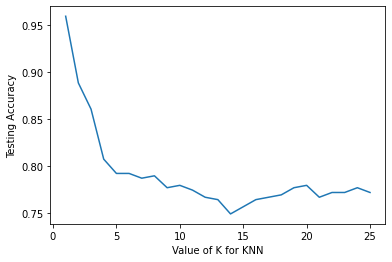

In [40]:
#We plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

From the result, we choose **k = 1** since it gives the highest accuracy.

In [41]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
# We can ask the model to directly calculate the accuracy
knn.score(train_X, train_y)

1.0

In [43]:
knn.score(test_X,test_y)

0.959493670886076

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
pred_1 = knn.predict(test_X)
print(pred_1[:10])

[0 1 0 1 0 0 0 0 0 1]


In [45]:
# And calculate the accuracy
print("Accuracy:", accuracy_score(test_y, pred_1))

Accuracy: 0.959493670886076


In [46]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_1))

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       266
           1       0.92      0.95      0.94       129

    accuracy                           0.96       395
   macro avg       0.95      0.96      0.95       395
weighted avg       0.96      0.96      0.96       395



**Note:** 
* The recall means "how many of this class you find over the whole number of element of this class"
* The precision will be "how many are correctly classified among that class"
* The f1-score is the harmonic mean between precision & recall
* The support is the number of occurence of the given class in your dataset 

In [47]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_1))

Confusion matrix:
[[256  10]
 [  6 123]]


**Note:**
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

[[TN  FP]

[FN TP]]

* TP: True postive
*TN: True negative
*FP: False positive
*FN: False Negative


#**Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

In [49]:
dtc=DecisionTreeClassifier()

In [50]:
dtc=dtc.fit(train_X,train_y)

In [51]:
pred_2=dtc.predict(test_X)

In [52]:
print(pred_2[:10])

[0 1 0 1 0 0 0 0 0 0]


In [53]:
print("Accuracy:", accuracy_score(test_y, pred_2))

Accuracy: 0.9822784810126582


In [54]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_2))

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.96      0.98      0.97       129

    accuracy                           0.98       395
   macro avg       0.98      0.98      0.98       395
weighted avg       0.98      0.98      0.98       395



In [55]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_2))

Confusion matrix:
[[261   5]
 [  2 127]]


#**Naive-Bayes**

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb=GaussianNB()

In [58]:
nb.fit(train_X,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
pred_3=nb.predict(test_X)

In [60]:
print(pred_3[:10])

[1 1 0 1 0 1 0 0 0 0]


In [61]:
print("Accuracy:", accuracy_score(test_y, pred_3))

Accuracy: 0.7493670886075949


In [62]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_3))

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       266
           1       0.62      0.60      0.61       129

    accuracy                           0.75       395
   macro avg       0.71      0.71      0.71       395
weighted avg       0.75      0.75      0.75       395



In [63]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_3))

Confusion matrix:
[[218  48]
 [ 51  78]]


##**7. Discussion**

Naive Bayes, decision trees and KNN, are examples of supervised learning (where the data comes already labelled).  Of the three methods, decision trees are the easiest to explain and understand. Most people understand hierarchical trees, and the availability of a clear diagram can help you to communicate your results. Conversely, the underlying mathematics behind Bayes Theorem can be very challenging to understand for the layperson. K-NN meets somewhere in the middle; Theoretically, you could reduce the K-NN process to an intuitive graphic, even if the underlying mechanism is probably beyond a layperson's level of understanding.

The **K-nearest neighbour (KNN)** algorithm is one of the simplest and earliest classification algorithms. It can be thought a simpler version of an Naive Bayes (NB) classifier. Unlike the NB technique, the KNN algorithm does not require to consider probability values. The ‘K’ is the KNN algorithm is the number of nearest neighbours considered to take ‘vote’ from. We select these k nearest neighbors based on Euclidean distance. Among these k neighbours, the number of data points in each category is counted, and the new data point is assigned to that category where we got the most neighbours in.

**Decision Tree Classification** is the most powerful classifier. A Decision tree is a flowchart like a tree structure, where each internal node denotes a test on an attribute (a condition), each branch represents an outcome of the test (True or False), and each leaf node (terminal node) holds a class label. A set of decision trees are built in parallel on tractable size training data sets which are a subset of the original data. Each learned decision tree will be reduced to a set of rules, conflicting rules resolved and the resultant rules merged into one set. Results from cross validation experiments on a data set suggest this approach may be effectively applied to large sets of data.


**Naive Bayes Classifier** works on the basis of Bayes’ Theorem. The fundamental assumptions made are that all the features are independent of one another and contribute equally to the outcome; all are of equal importance. **But these assumptions are not always valid in real life** (disadvantage of Naive Bayes). It is a probabilistic classifier model whose crux is the Bayes’ theorem. From our predictions before, variables such as 'Insulin' may not be good indicator of diabetes, hence there is no wonder that NB method gives lower accuracy as it consider the contribution of each variable equally.


In [66]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree','Naive Bayes'],
    'Score': [accuracy_score(test_y, pred_1), accuracy_score(test_y, pred_2), accuracy_score(test_y, pred_3)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,0.982278
0,KNN,0.959494
2,Naive Bayes,0.749367


In conclusion, Decision Tree Classifier gives the highest accuracy (0.982), followed by k-Nearest Neighbors (0.959), and Gaussian Naive Bayes has the lowest accuracy (0.749).

Decision Tree Classifier is he best model for this classification task.